In [6]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random

import project_functions

%matplotlib inline
cars = glob.glob('./vehicles/KITTI_extracted/*.png') + glob.glob('./vehicles/GTI_Far/*.png') + glob.glob('./vehicles/GTI_Left/*.png') + glob.glob('./vehicles/GTI_Right/*.png') + glob.glob('./vehicles/GTI_MiddleClose/*.png')
non_cars = glob.glob('./non-vehicles/GTI/*.png') + glob.glob('./non-vehicles/Extras/*.png')

car_idx = random.randint(0, len(cars))
non_car_idx = random.randint(0, len(non_cars))

## Data exploration

{'n_cars': 8792, 'image_shape': (64, 64, 3), 'n_notcars': 8968, 'data_type': dtype('float32')}


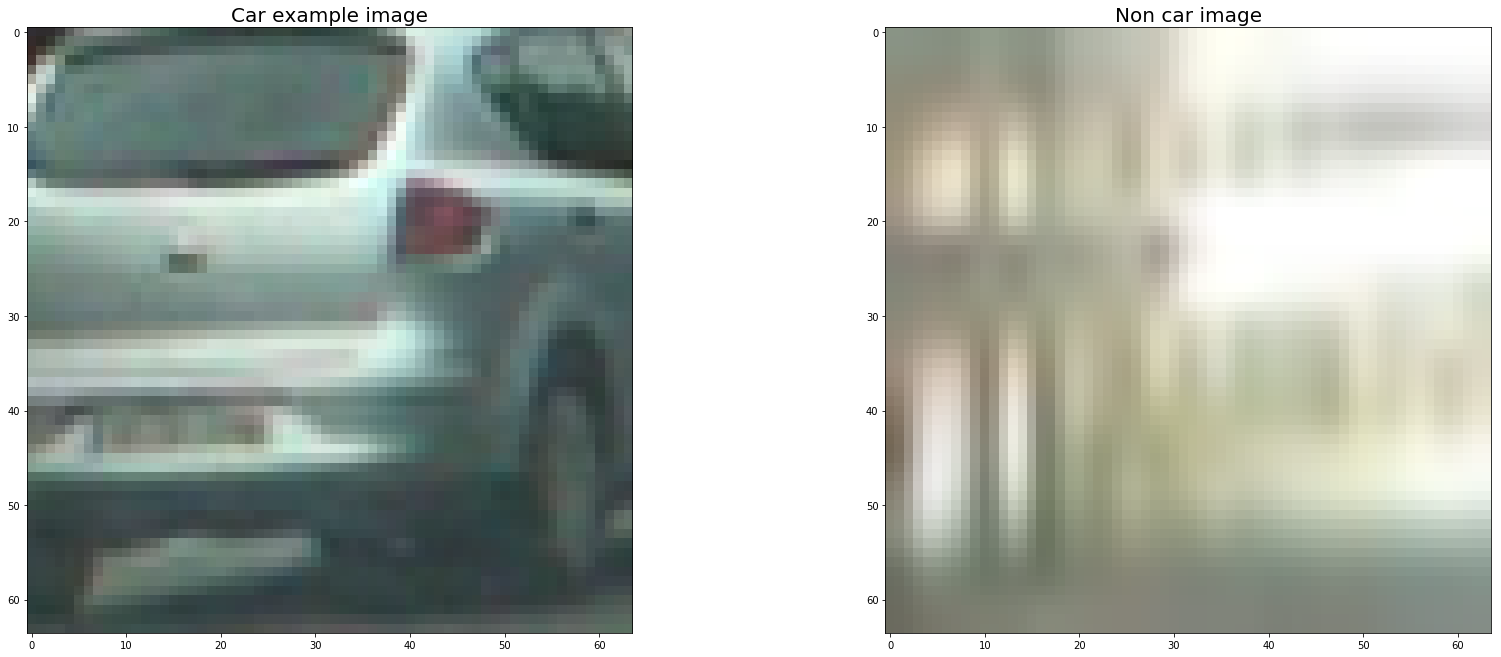

In [7]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
print(data_look(cars, non_cars))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(mpimg.imread(cars[car_idx]))
ax1.set_title('Car example image', fontsize=20)
ax2.imshow(mpimg.imread(non_cars[non_car_idx]))
ax2.set_title('Non car image', fontsize=20)
f.savefig("./output_images/car-not-car.png")

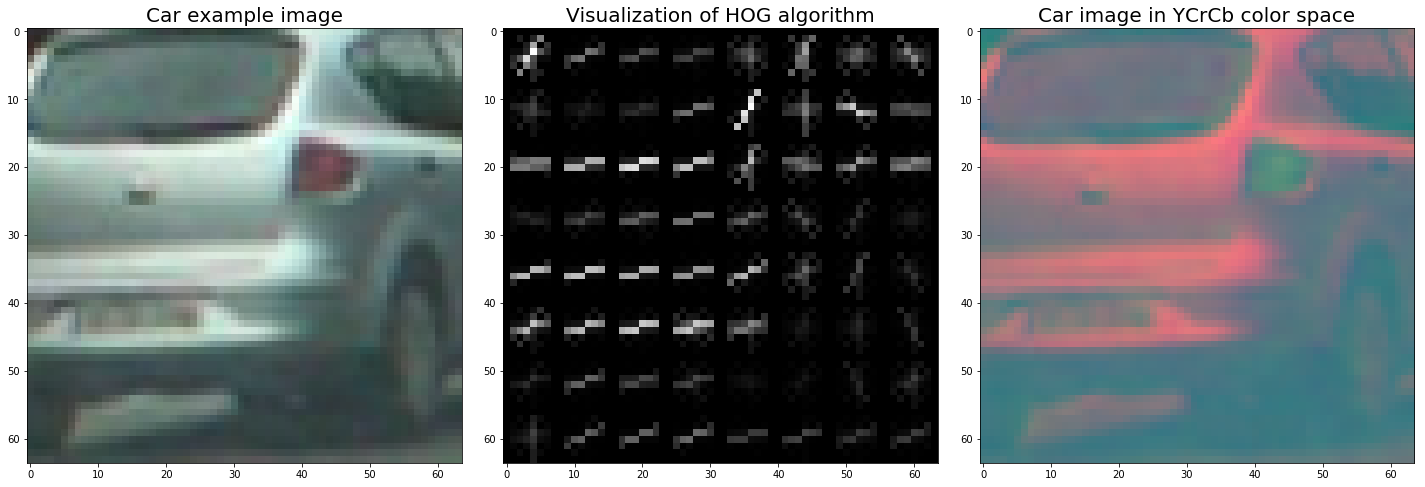

In [14]:
car_img = mpimg.imread(cars[car_idx])
_, hog_vis = project_functions.get_hog_features(car_img[:, :, 0], 9, 8, 2, vis=True, feature_vec=True)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
f.tight_layout()
ax1.imshow(mpimg.imread(cars[car_idx]))
ax1.set_title('Car example image', fontsize=20)
ax2.imshow(hog_vis, cmap='gray')
ax2.set_title('Visualization of HOG algorithm', fontsize=20)
ax3.imshow(project_functions.convert_color(car_img))
ax3.set_title('Car image in YCrCb color space', fontsize=20)
f.savefig("./output_images/car-hog-viz.png")

In [11]:
non_car_features = project_functions.extract_features(non_cars, color_space='YCrCb', hog_channel='ALL')
car_features = project_functions.extract_features(cars, color_space='YCrCb', hog_channel='ALL')

/Users/iyed/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [4]:
X = np.vstack((car_features, non_car_features)).astype(np.float64)                        
X_scaler = StandardScaler().fit(X)

In [5]:
scaled_X = X_scaler.transform(X)

In [6]:
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

In [7]:
svc = LinearSVC()
svc.fit(X_train, y_train)
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample

n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])

Test Accuracy of SVC =  0.9924
My SVC predicts:  [ 0.  1.  1.  0.  1.  0.  1.  0.  0.  1.]
For these 10 labels:  [ 0.  1.  1.  0.  1.  0.  1.  0.  0.  1.]


In [8]:
import pickle


dist_pickle = {}

dist_pickle['svc'] = svc
dist_pickle["scaler"] = X_scaler
dist_pickle["orient"] = 9
dist_pickle["pix_per_cell"] = 8
dist_pickle["cell_per_block"] = 2
dist_pickle["spatial_size"] = (32, 32)
dist_pickle["hist_bins"] = 32

pickle.dump(dist_pickle, open('classifier.p', 'wb'))